<a href="https://colab.research.google.com/github/CristianCosci/LAB_MachineLearning_course/blob/main/Lab_SVM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [105]:
iris = datasets.load_iris()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=109) # 70% training and 30% test

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [16]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_model = SVC(kernel='linear')
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("accuracy on test SVC: ", metrics.accuracy_score(y_test, y_pred))

#-----------------------------------------------------------------------

svm_linear_model = LinearSVC()
svm_linear_model = svm_linear_model.fit(X_train, y_train)
y_pred_linear = svm_linear_model.predict(X_test)
print("accuracy on test linearSVC: ", metrics.accuracy_score(y_test, y_pred_linear))

accuracy on test SVC:  0.9555555555555556
accuracy on test linearSVC:  0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'scv vis decision boundaries')

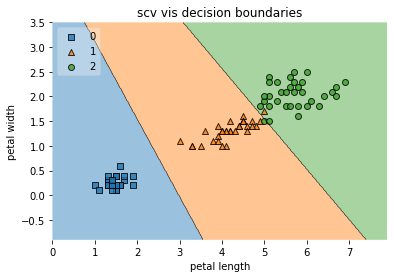

In [27]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

svc_vis = SVC(kernel="linear", decision_function_shape='ovo') 
svc_vis = svc_vis.fit(X_train[:, 2:4], y_train) 

#TO DO : plot decision_regions
plot_decision_regions(X_train[:, 2:4], y_train, clf = svc_vis, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("scv vis decision boundaries")

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'scv2 vis decision boundaries')

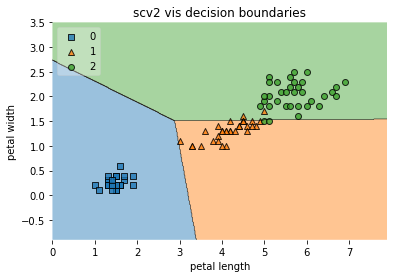

In [26]:
svc2_vis = LinearSVC() 
svc2_vis = svc2_vis.fit(X_train[:, 2:4], y_train) 

plot_decision_regions(X_train[:, 2:4], y_train, clf = svc2_vis, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("scv2 vis decision boundaries")

In [35]:
import pandas as pd

iris_modified = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_modified_redundantAttib.csv')

non_linear_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/non_linear_data.csv')

In [36]:
print(iris_modified.head())

   sepal_length  sepal_width  petal_length  petal_width  target species  \
0           5.1          3.5           1.4          0.2       0  setosa   
1           4.9          3.0           1.4          0.2       0  setosa   
2           4.7          3.2           1.3          0.2       0  setosa   
3           4.6          3.1           1.5          0.2       0  setosa   
4           5.0          3.6           1.4          0.2       0  setosa   

   random_values  new_attribute_1  new_attribute_2  new_attribute_3  \
0       2.037947        10.473353         7.212637         2.932948   
1       1.939475         9.825746         6.140744         3.037584   
2       1.919324         9.392233         6.513247         2.866531   
3       1.997273         9.618824         6.622916         3.427279   
4       2.016114        10.247828         7.425268         2.989817   

   new_attribute_4  new_attribute_5  
0         0.487411         5.005036  
1         0.710214         5.052914  
2       

In [37]:
train_x, test_x, train_y, test_y = train_test_split(iris_modified[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','new_attribute_1','new_attribute_2','new_attribute_3', 'new_attribute_4', 'new_attribute_5']], iris_modified['target'], test_size=0.3, random_state = 109)


In [38]:
svc = SVC(kernel = "linear")

svc = svc.fit(train_x, train_y)
y_pred = svc.predict(test_x)

print("accuracy on test SVC: ", metrics.accuracy_score(y_test, y_pred))

accuracy on test SVC:  0.8888888888888888


In [ ]:
non_linear_data = non_linear_data.drop(columns=['Unnamed: 0'], axis=0)
print(non_linear_data.head())
print(len(non_linear_data))

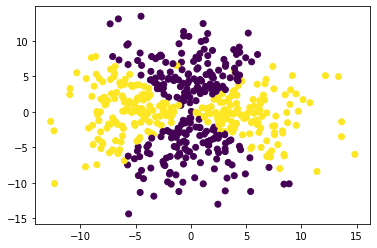

In [52]:
plt.scatter(x = non_linear_data.x, y = non_linear_data.y, c = non_linear_data.c)

In [66]:
import numpy as np

points = np.asarray(non_linear_data[['x', 'y']])
labels = np.asarray(non_linear_data['c'])

#split the data into training and testing
train_points, test_points , train_labels, test_labels = train_test_split(points, labels, test_size = 0.2, random_state = 19)

In [89]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(train_points, train_labels)

y_pred = knn.predict(test_points)

print("accuracy on test DT: ", metrics.accuracy_score(test_labels, y_pred))

accuracy on test DT:  0.99


NB Accuracy:  0.95


In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn = knn.fit(train_points, train_labels)

y_pred = knn.predict(test_points)

print("accuracy on test KNN: ", metrics.accuracy_score(test_labels, y_pred))

accuracy on test KNN:  0.99


In [96]:
svm_model = SVC(kernel='linear')
svm_model = svm_model.fit(train_points, train_labels)
y_pred = svm_model.predict(test_points)
print("accuracy on test SVC lineare: ", metrics.accuracy_score(test_labels, y_pred))

accuracy on test SVC lineare:  0.51


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


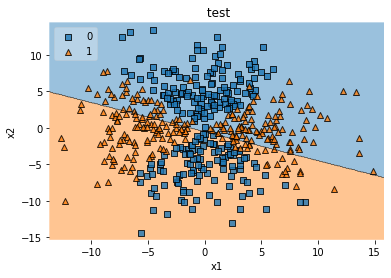

In [97]:
plot_decision_regions(points, labels, clf=svm_model, legend =2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(' test')
plt.show()

accuracy on test SVC rbf:  0.88


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, ' test')

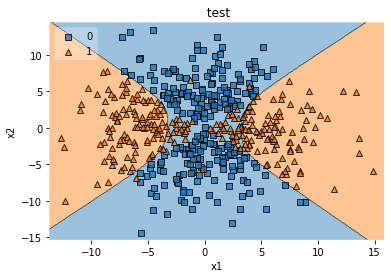

In [104]:
svm_model = SVC(kernel='poly', degree=4)
svm_model = svm_model.fit(train_points, train_labels)
y_pred = svm_model.predict(test_points)
print("accuracy on test SVC rbf: ", metrics.accuracy_score(test_labels, y_pred))

# Plotting decision regions
plot_decision_regions(points, labels, clf=svm_model, legend=2)

# Adding axes annotations
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(' test')

In [127]:
iris = datasets.load_iris()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3) # 70% training and 30% test

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [117]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(), random_state=1, max_iter=100000, verbose=False).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print('Accuracy train: ', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy test: ', metrics.accuracy_score(y_test, y_pred))

0.9111111111111111
Accuracy train:  0.9523809523809523
Accuracy test:  0.9111111111111111


In [128]:
clf = MLPClassifier(hidden_layer_sizes=(100, 150, 100), random_state=1, max_iter=100000, verbose=False, early_stopping = False).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))
print('Accuracy train: ', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy test: ', metrics.accuracy_score(y_test, y_pred))

0.9555555555555556
Accuracy train:  0.9904761904761905
Accuracy test:  0.9555555555555556
